### Loan prediction :- this analysis is to create a model that would be able to predict if a person is elegible for a loan or not

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "data\loan_data.csv"
df = pd.read_csv(data)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
# check for null values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# check for duplicated rows
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

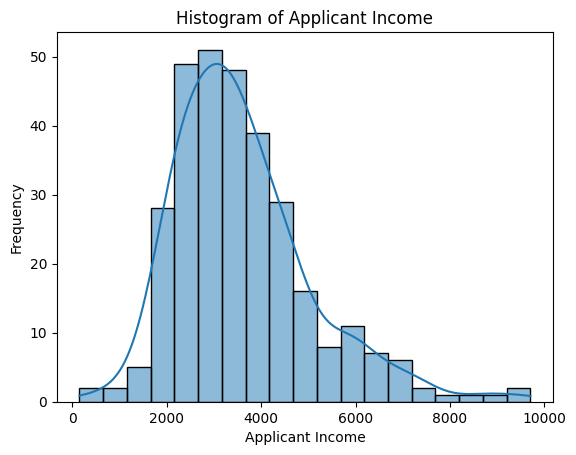

In [10]:
sns.histplot(df["ApplicantIncome"],kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

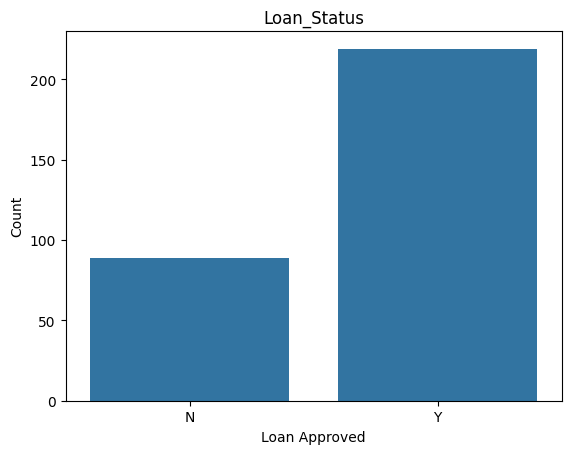

In [11]:
sns.countplot(data=df,x="Loan_Status")
plt.title("Loan_Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [12]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


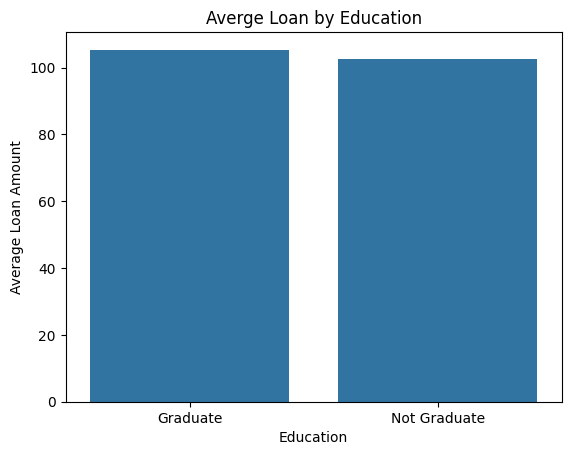

In [13]:
sns.barplot(x="Education",y="LoanAmount",data=avg_loan_amount_by_education)
plt.title("Averge Loan by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()


C:\Users\personal\AppData\Local\Temp\ipykernel_20520\507415364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Property_Area", y= "LoanAmount",palette="cool")


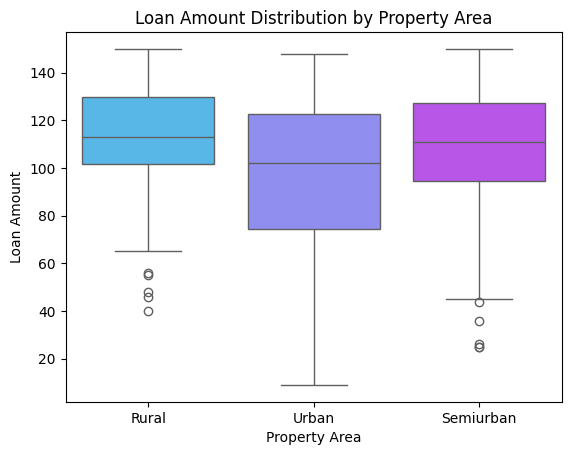

In [14]:
sns.boxplot(data=df,x="Property_Area", y= "LoanAmount",palette="cool")
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

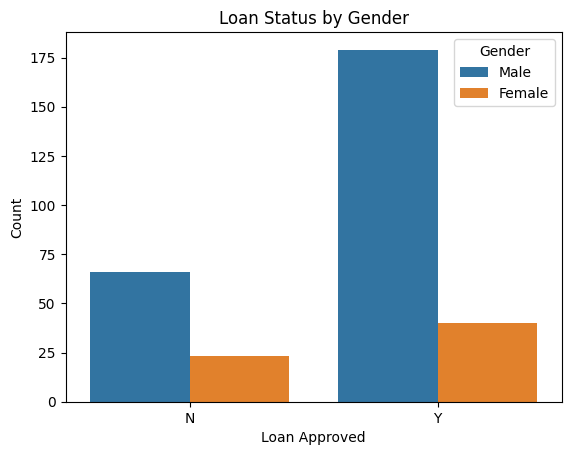

In [15]:
sns.countplot(data=df,x="Loan_Status",hue="Gender")
plt.title("Loan Status by Gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='count'>

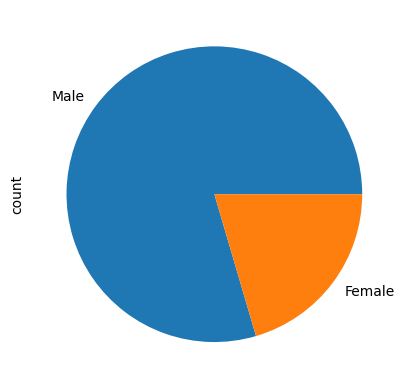

In [16]:
df["Gender"].value_counts().plot(kind="pie")

In [17]:
loan_status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

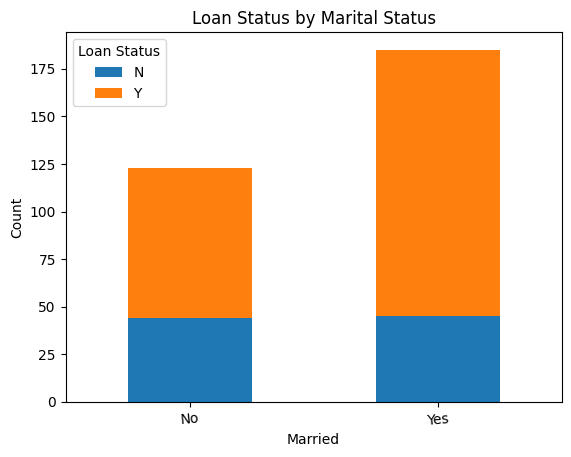

In [18]:
loan_status_by_married.plot(kind="bar",stacked=True)
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=5)
plt.show()

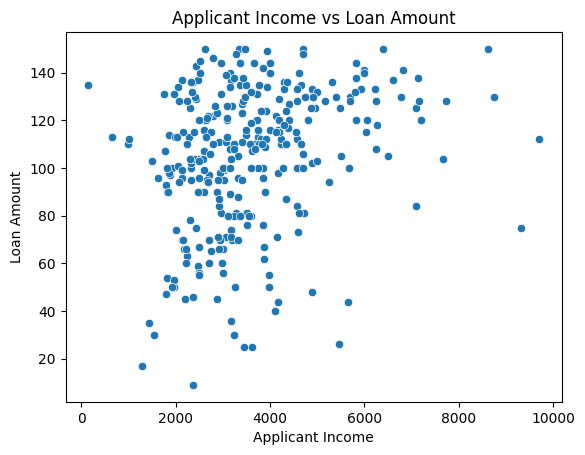

In [19]:
sns.scatterplot(x="ApplicantIncome",y="LoanAmount",data=df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [20]:
numeric_df = df.select_dtypes(include=['int64','float64'])

In [21]:
numeric_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0


In [22]:
correlation_metrix = numeric_df.corr()

In [23]:
correlation_metrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


<Axes: >

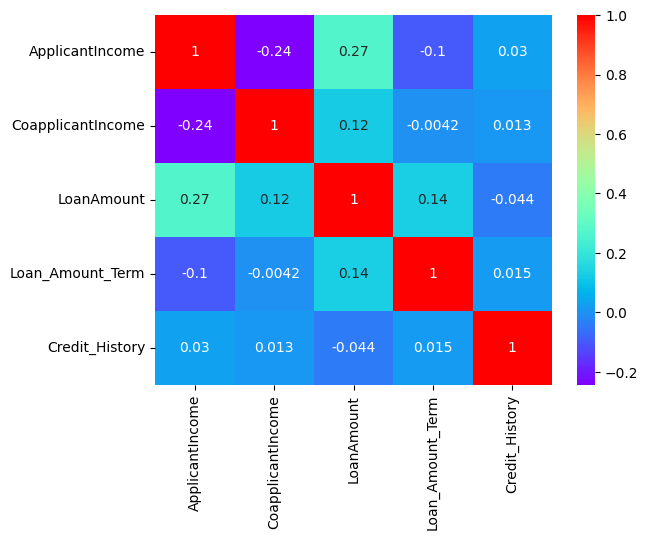

In [24]:
sns.heatmap(correlation_metrix,annot=True,cmap="rainbow")

In [25]:
avg_loan_term_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()

In [26]:
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


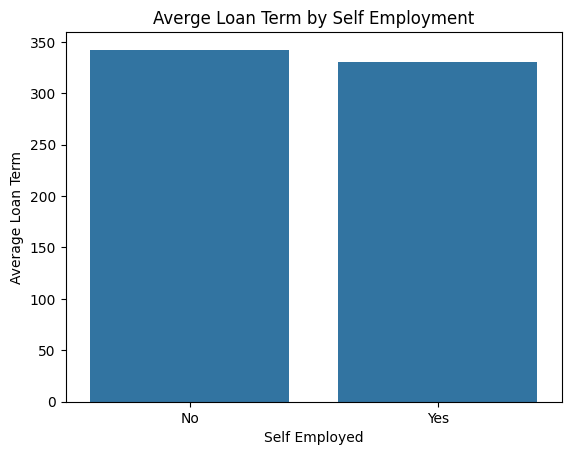

In [27]:
sns.barplot(x="Self_Employed",y="Loan_Amount_Term",data=avg_loan_term_by_employed)
plt.title("Averge Loan Term by Self Employment")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()

In [28]:
df["Credit_History"].unique()

array([1., 0.])

In [29]:
X = df[["Married","ApplicantIncome","Education","LoanAmount","Credit_History"]]

In [30]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,Yes,4583,Graduate,128.0,1.0
1,Yes,3000,Graduate,66.0,1.0
2,Yes,2583,Not Graduate,120.0,1.0
3,No,6000,Graduate,141.0,1.0
4,Yes,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Graduate,128.0,1.0
377,Yes,3232,Graduate,108.0,1.0
378,No,2900,Graduate,71.0,1.0
379,Yes,4106,Graduate,40.0,1.0


In [31]:
y = df[["Loan_Status"]]

In [32]:
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
y["Loan_Status"] = le.fit_transform(y["Loan_Status"])

C:\Users\personal\AppData\Local\Temp\ipykernel_20520\2834750797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Loan_Status"] = le.fit_transform(y["Loan_Status"])


In [35]:
y.value_counts() # Y is 1 and N is 0

Loan_Status
1              219
0               89
Name: count, dtype: int64

In [36]:
le.classes_

array(['N', 'Y'], dtype=object)

In [37]:
X["Married"] = le.fit_transform(X["Married"] )

C:\Users\personal\AppData\Local\Temp\ipykernel_20520\429291956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Married"] = le.fit_transform(X["Married"] )


In [38]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,Graduate,128.0,1.0
1,1,3000,Graduate,66.0,1.0
2,1,2583,Not Graduate,120.0,1.0
3,0,6000,Graduate,141.0,1.0
4,1,2333,Not Graduate,95.0,1.0
...,...,...,...,...,...
376,1,5703,Graduate,128.0,1.0
377,1,3232,Graduate,108.0,1.0
378,0,2900,Graduate,71.0,1.0
379,1,4106,Graduate,40.0,1.0


In [39]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [40]:
X["Education"] = le.fit_transform(X["Education"])

C:\Users\personal\AppData\Local\Temp\ipykernel_20520\1342090947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = le.fit_transform(X["Education"])


In [41]:
X

,Married,ApplicantIncome,Education,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,0,66.0,1.0
2,1,2583,1,120.0,1.0
3,0,6000,0,141.0,1.0
4,1,2333,1,95.0,1.0
...,...,...,...,...,...
376,1,5703,0,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [42]:
le.classes_

array(['Graduate', 'Not Graduate'], dtype=object)

FEATURE SCALING

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X = scaler.fit_transform(X)

In [46]:
X

array([[ 0.81539246,  0.67389339, -0.58734842,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528, -0.58734842, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.70256694,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -0.58734842, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -0.58734842, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.58734842,  0.96734579, -2.41752858]])

In [47]:
import joblib
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
def model_performance(prediction):
    print(f"Accuracy score of model is {accuracy_score(y_test,prediction)}".format())

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
log_predicted = log_model.predict(X_test)

In [54]:
model_performance(log_predicted)

Accuracy score of model is 0.7956989247311828


In [55]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors":[10,11,12,13,15],
    "weights":["uniform","distance"]
    }

grid_Kn = GridSearchCV(KNeighborsClassifier(),param_grid)

In [56]:
# the extra stuff after the fitted inputs are just there to 
# prevent it form generating all the nonsense while fitting
grid_Kn.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 11, 12, 13, 15],
                         'weights': ['uniform', 'distance']})

In [57]:
grid_Kn.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [58]:
kn_predicted = grid_Kn.predict(X_test)

In [59]:
model_performance(kn_predicted)

Accuracy score of model is 0.7956989247311828


In [60]:
from sklearn.svm import SVC 

svm = SVC()

param_grid_svc = {"C":[0.01,0.05,1.0],
                  "kernel":["linear","rbf","poly"]
    }

In [61]:
grid_svc = GridSearchCV(svm,param_grid_svc)

In [62]:
grid_svc.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 1.0],
                         'kernel': ['linear', 'rbf', 'poly']})

In [63]:
svc_predicted = grid_svc.predict(X_test)

In [64]:
model_performance(svc_predicted)

Accuracy score of model is 0.7956989247311828


In [65]:
grid_svc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [66]:
joblib.dump(grid_svc,"model.pkl")

['model.pkl']